In [2]:
options(warn=-1)
library(ggplot2)
library(GGally)
library(unifed)
exit <- function() { invokeRestart("abort") }  

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



1. Моделировать выборки Xi,j , i ≤ 1000, j ≤ n, где i) n=20 ii) n=100 величин из распределений а)Bern(1/2), б) R[0, 1], в) exp(1), г) Коши. Найти Si,n =Pnj=1 Xi,j и построить на одном графике ЭФРSn,i и ф.р. N (nX, nS2), где X, S2 – выборочное среднее и выборочная дисперсия всех имеющихся наблюдений. Похожи ли визуально полученные графики?

In [ ]:
n=strtoi(readline())
type=readline
type=readline()
if (type=='Bern'){
    X<-data.frame(rbinom(1000,1,1/2))
    for (i in 1:(n-1)){
        X<-cbind(X,rbinom(1000,1,1/2))
    }
}else if (type=='R'){
    X<-data.frame(runif(1000,0,1))
    for (i in 1:(n-1)){
        X<-cbind(X,runif(1000,0,1))
    }
}else if (type=='exp'){
    X<-data.frame(rexp(1000,1))
    for (i in 1:(n-1)){
        X<-cbind(X,rexp(1000,1))
    }
}else if (type=='Cauchy'){
    X<-data.frame(rcauchy(1000,0,1))
    for (i in 1:(n-1)){
        X<-cbind(X,rcauchy(1000,0,1))
    }
}else{
    exit()
}
s=integer(1000)
for (i in 1:1000){
    s[i]<-sum(X[i,])
}
Xbar=mean(as.matrix(X))
Xbar
S2=var(c(as.matrix(X)))
S2
plot(ecdf(s))
x=seq(from = Xbar-3*S2,to = Xbar+3*S2,1000)
curve(pnorm(x,n*Xbar,(n*S2)^(1/2)),from = n*Xbar-3*n*S2,to = n*Xbar+3*n*S2,add=TRUE)

2. Пусть X ∼ Gamma(n, 4) Построить на одном графике графики плотности распределения с.в.(X − EX)/√DX и плотности N (0, 1) для различных n.

In [ ]:
uppern=readline()
n=1
curve(dgamma(x*n^0.5*4+n*4,shape=n,scale=4)*n^0.5*4,-3,3,col=n+1)
for (n in seq(1,uppern,by=10)){
    curve(dgamma(x*n^0.5*4+n*4,shape=n,scale=4)*n^0.5*4,-3,3,col=n+1,add=TRUE)
}
curve(dnorm(x,0,1),-3,3,lwd=3,add=TRUE)

3. Построить гистограмму по набору значений с.в. Sn = X1 + . . . + Xn − μn (генерируем k выборок X1, . . . , Xn, по каждой находим одно значение суммы). На том же графике построить плотность распределения c.в. Sn (для дискретных – дискретное распределение) и плотность N (0, σ2n). Здесь распределения Xi рассматриваются следующие (В1): Poiss(λ), exp(λ).
• * Для всех вариантов R[0,1] (для поиска плотности распределения суммы можно исполь-
зовать sympy.stats.UniformSum() или написать формулу самостоятельно, см. распределение
Ирвина–Холла),

20
1000
2
a


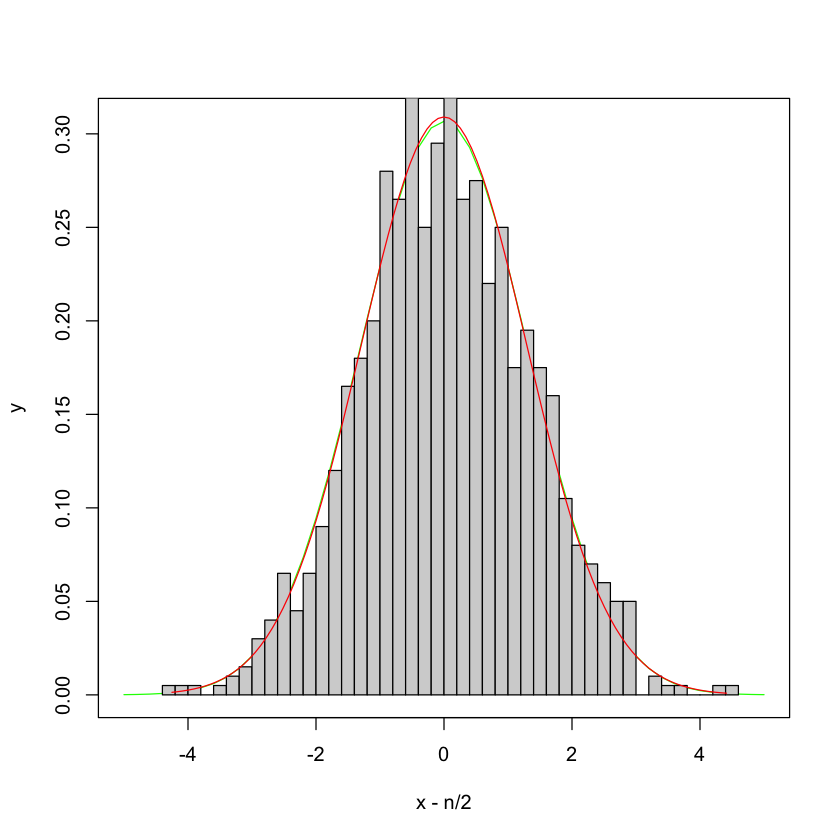

In [3]:
n=strtoi(readline())
k=strtoi(readline())
type=strtoi(readline())
lambda=as.double(readline())
S=0
if (type==1){#poiss, poiss
    for (i in 1:k){
        X<-rpois(n,lambda)
        S[i]<-sum(X)-lambda*n
    }
}else if (type==2){#unif, irwin-hall
    for (i in 1:k){
        X<-runif(n,min=0,max=1)
        S[i]<-sum(X)-n/2
    }
}else{
    for (i in 1:k){#exp, gamma
        X<-rexp(n,lambda)
        S[i]<-sum(X)-1/lambda*n
    }
}
if (type==1){
    x=seq(min(S),max(S))
    hist(S,freq=FALSE,breaks=40)
    points(x,dpois(x+lambda*n,lambda*n))
    curve(dnorm(x,0,(lambda*n)^0.5),from=min(S),to=max(S),add=TRUE,col='red')
}else if (type==2){
    x=seq(n/4,3*n/4,n/100)
    y=0
    for (i in 1:length(x)){
      y[i]=dirwin.hall(x[i],n)  
    }
    plot(x-n/2,y,type='l',col='green',linewidth=3)
    hist(S,freq=FALSE,breaks=40,stat='density',add=TRUE)
    curve(dnorm(x,0,(n/12)^0.5),from=min(S),to=max(S),add=TRUE,col='red')
}else{
    x=0
    hist(S,freq=FALSE,breaks=40)
    curve(dgamma(x+n/lambda,shape=n,rate=lambda),add=TRUE,col='green',linewidth=3)
    curve(dnorm(x,0,n**0.5/lambda),from=min(S),to=max(S),add=TRUE,col='red')
}

 4. Обозначим Y = (Sn − nμ)/(σ√n). Построить на одном графике: FY (x) − Φ(x), правую часть неравенства Берри–Эссеена, ее же, умноженную на -1, правую часть асимптотического разложения. Рассмотреть n = 5, 10, 20, 50, 100, 500. Соотнести полученные результаты с теоремами 3 и 4. Рассмотрите следующие распределения Xi: Bern(p), exp(λ). 

In [ ]:
n=strtoi(readline())
type=tolower(readline())
if (type=='bern'){
    p=as.double(readline())
    rhs=0.4784*((1-p)^3*p+p^3*(1-p))/n^0.5/(p*(1-p))^1.5
    x=seq(-3,3,0.01)
    plot(x,pbinom(x*(p*(1-p)*n)^0.5+n*p,n,p)-pnorm(x,0,1),type='l',ylim=c(-rhs*1.5,+rhs*1.5))
    ro3=p*(1-p)^3-p^3*(1-p)
    a3=ro3/(p*(1-p))^1.5
    curve(a3/(6*(2*pi*n))^0.5*(1-x^2)*exp(-x^2/2),add=TRUE,col='red')
    abline(h=rhs)
    abline(h=-rhs)
}else{
    lambda=as.double(readline())
    expectation=0
    X=rexp(1000,lambda)
    expectation=mean((X-mean(X))^3)
    rhs=0.4784*expectation/n^0.5/(1/lambda^3)
    x=seq(-3,3,0.01)
    plot(x,pgamma(x*(n/lambda^2)^0.5+n/lambda,n,rate=lambda)-pnorm(x,0,1),type='l',ylim=c(-rhs*1.5,+rhs*1.5))
    ro3=2/lambda^3
    a3=ro3*lambda^3
    curve(a3/(6*(2*pi*n))^0.5*(1-x^2)*exp(-x^2/2),add=TRUE,col='red')
    abline(h=rhs)
    abline(h=-rhs)
}